<a href="https://colab.research.google.com/github/fintechutcc/mof-training/blob/main/mof-training-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)

LDA เป็นเทคนิคในการแปลงข้อมูลอย่างหนึ่ง มีหลักการใกล้เคียงกับ PCA ต่างกันที่ PCA นั้นเป็นเทคนิคที่เป็น Unsupervised Learning ในขณะที่ LDA นั้นมีการคำนวณค่าเฉลี่ยของคลาสหรือเลเบล ดังนั้นกล่าวได้ว่า LDA เป็น Supervised Learning 


## ขั้นตอนของ LDA

การแปลงข้อมูลโดยใช้ LDA ทำได้ดังนี้



1.   ทำการ Standardization บนข้อมูลที่ใช้ในการเรียนรู้
2.   สร้าง Mean Vectors โดยคำนวณค่าเฉลี่ยของแต่ละคอลัมน์แยกตามเลเบลของข้อมูล
3.   สร้าง Within-Class Scatter Matrix, Sw และ Between-Class Scatter Matrix, Sb
4.   สร้าง Eigenvectors และ Eigenvalues ของเมตริกซ์ Sw^(-1).Sb
5.   เรียงลำดับ Eigenvectors ตามค่า Eigenvalues จากมากไปน้อย
6.   เลือก k Eigenvectors เพื่อนำมาสร้าง Projection Matrix W ขนาด dxk
7.   แปลงข้อมูล X เป็น X' โดย X' = X.W




In [ ]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('/content/drive/My Drive/data/ML/wine.data')
df_wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2020)

## ขั้นตอนที่ 1: ทำการ Standardization บนข้อมูลที่ใช้ในการเรียนรู้

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std  = ss.transform(X_test)

## ขั้นตอนที่ 2: สร้าง Mean Vectors โดยคำนวณค่าเฉลี่ยของแต่ละคอลัมน์แยกตามเลเบลของข้อมูล

In [ ]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.8902 -0.2806  0.2905 -0.7732  0.4018  0.8083  0.9194 -0.555   0.4749
  0.1265  0.489   0.7876  1.1872]

MV 2: [-0.9044 -0.4028 -0.427   0.189  -0.3524  0.0072  0.082  -0.0088  0.0737
 -0.833   0.4567  0.2357 -0.7076]

MV 3: [ 0.2562  0.9106  0.2737  0.6372  0.0351 -0.9614 -1.1999  0.6657 -0.6648
  1.0517 -1.2335 -1.2663 -0.377 ]



## ขั้นตอนที่ 3: สร้าง Within-Class Scatter Matrix, Sw และ Between-Class Scatter Matrix, Sb

In [ ]:
d = 13
Sw = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.zeros((d,d))

for row in X_train_std[y_train == label]:
  row, mv = row.reshape(d, 1), mv.reshape(d, 1)
  class_scatter += (row - mv).dot((row - mv).T)
  Sw += class_scatter

print('Within-class scatter matrix: %sx%s' % (Sw.shape[0], Sw.shape[1]))
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Within-class scatter matrix: 13x13
Class label distribution: [40 49 34]


In [ ]:
Sw

array([[ 2.3914e+02,  5.0461e+00,  1.0910e+02,  7.2239e+01,  1.6995e+01,
         4.0633e+01, -9.6546e+00,  7.3346e+01,  4.8058e+01,  3.6008e+01,
         4.3413e+01,  2.2164e+01, -5.9378e+00],
       [ 5.0461e+00,  4.0531e+02,  4.1718e+01,  3.1217e+01, -6.0148e+01,
         3.3056e+01, -4.4596e+01,  1.4159e+02, -3.9501e+01, -1.7909e+01,
         2.9819e+01,  4.5143e+01,  1.5385e+01],
       [ 1.0910e+02,  4.1718e+01,  3.0922e+02,  2.4036e+02,  1.1727e+02,
         9.9943e+01,  3.7227e+01, -8.5926e+01,  1.5140e+01,  2.2381e+01,
         1.7795e+01, -1.5344e+00, -7.1246e+01],
       [ 7.2239e+01,  3.1217e+01,  2.4036e+02,  2.7457e+02,  1.0074e+02,
         6.7675e+01,  4.2205e+01, -9.2904e+01,  3.6890e+01, -6.6729e+00,
        -1.6712e+01, -3.3855e+01, -6.7130e+01],
       [ 1.6995e+01, -6.0148e+01,  1.1727e+02,  1.0074e+02,  3.8277e+02,
        -2.1965e+01,  9.2777e+01, -3.4445e+02,  6.2637e+01,  5.2124e+01,
        -1.9955e+01, -7.3887e+01, -1.5377e+01],
       [ 4.0633e+01,  3.3056e+

In [ ]:
d = 13
Sw = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train==label].T)
  Sw += class_scatter

print('Scaled within-class scatter matrix: %sx%s' % (Sw.shape[0], Sw.shape[1]))
Sw

Scaled within-class scatter matrix: 13x13


array([[ 1.2372, -0.1354, -0.027 , -0.1133, -0.0408,  0.3137,  0.1238,
         0.1476,  0.2537,  0.4081,  0.1966, -0.0196,  0.1289],
       [-0.1354,  2.0888,  0.2347,  0.3302, -0.0476, -0.0332, -0.0639,
         0.1292, -0.0319, -0.4473, -0.3483,  0.244 , -0.2925],
       [-0.027 ,  0.2347,  2.5068,  1.5602,  0.5118,  0.3683,  0.4064,
         0.3823,  0.2164,  0.1811, -0.0159,  0.2354,  0.0223],
       [-0.1133,  0.3302,  1.5602,  1.9763,  0.1788,  0.168 ,  0.2359,
         0.2394,  0.1184, -0.0358, -0.154 ,  0.2889, -0.1608],
       [-0.0408, -0.0476,  0.5118,  0.1788,  2.5754,  0.0343,  0.1929,
        -0.5529,  0.439 ,  0.1942, -0.0988, -0.242 ,  0.3168],
       [ 0.3137, -0.0332,  0.3683,  0.168 ,  0.0343,  1.5289,  0.82  ,
        -0.1777,  0.9266,  0.5723, -0.1338,  0.4365,  0.1162],
       [ 0.1238, -0.0639,  0.4064,  0.2359,  0.1929,  0.82  ,  0.8921,
        -0.3669,  0.7341,  0.4326, -0.0812,  0.2873,  0.0191],
       [ 0.1476,  0.1292,  0.3823,  0.2394, -0.5529, -0.1777, 

In [ ]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
Sb = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    Sb += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (Sb.shape[0], Sb.shape[1]))
Sb

Between-class scatter matrix: 13x13


array([[ 7.4006e+01,  1.5789e+01,  3.1652e+01, -3.0356e+01,  3.0227e+01,
         2.0089e+01,  1.8649e+01, -1.3573e+01,  7.8537e+00,  5.0577e+01,
        -1.3573e+01,  6.5665e+00,  7.0349e+01],
       [ 1.5789e+01,  3.9295e+01,  1.3640e+01,  2.4677e+01,  3.5317e+00,
        -3.8982e+01, -4.9090e+01,  2.7017e+01, -2.7369e+01,  4.7581e+01,
        -5.2694e+01, -5.2700e+01, -1.1033e+01],
       [ 3.1652e+01,  1.3640e+01,  1.4858e+01, -7.0111e+00,  1.2369e+01,
         2.9793e-01, -2.1969e+00, -7.0909e-02, -2.2087e+00,  2.8684e+01,
        -1.5351e+01, -7.5624e+00,  2.5096e+01],
       [-3.0356e+01,  2.4677e+01, -7.0111e+00,  3.9466e+01, -1.4928e+01,
        -4.5760e+01, -5.3668e+01,  3.1506e+01, -2.8407e+01,  1.1157e+01,
        -3.7614e+01, -4.9607e+01, -5.1438e+01],
       [ 3.0227e+01,  3.5317e+00,  1.2369e+01, -1.4928e+01,  1.2583e+01,
         1.1719e+01,  1.1926e+01, -7.9727e+00,  5.5663e+00,  1.7670e+01,
        -1.5002e+00,  7.0753e+00,  3.0848e+01],
       [ 2.0089e+01, -3.8982e+

## ขั้นตอนที่ 4: สร้าง Eigenvectors และ Eigenvalues ของเมตริกซ์ Sw^(-1).Sb

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

## ขั้นตอนที่ 5: เรียงลำดับ Eigenvectors ตามค่า Eigenvalues จากมากไปน้อย

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

361.33531238827
179.54536969514493
5.684341886080802e-14
2.6590721522162586e-14
2.5745936227602e-14
2.5745936227602e-14
2.114107009806632e-14
2.114107009806632e-14
1.1951199411439492e-14
1.1951199411439492e-14
1.1523163646453872e-14
2.807221389845901e-15
1.0472854344263524e-16


## ขั้นตอนที่ 6: เลือก k Eigenvectors เพื่อนำมาสร้าง Projection Matrix W ขนาด dxk

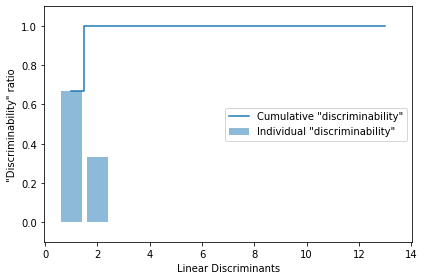

In [ ]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0654  0.5028]
 [ 0.1189  0.2211]
 [-0.0367  0.3011]
 [ 0.2389 -0.2725]
 [-0.0249 -0.0227]
 [ 0.1168 -0.2075]
 [-0.6707 -0.0257]
 [-0.0666 -0.1113]
 [ 0.0216 -0.1281]
 [ 0.3818  0.2408]
 [-0.1165 -0.2886]
 [-0.4066  0.0809]
 [-0.36    0.559 ]]


## ขั้นตอนที่ 7: แปลงข้อมูล X เป็น X' โดย X' = X.W

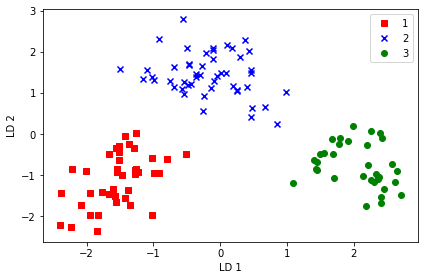

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1] * (-1),
                c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## LDA ด้วย sklearn API

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lda.explained_variance_ratio_

array([0.6611, 0.3389])

In [ ]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

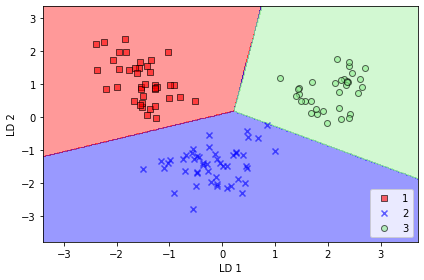

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=2020,
                        solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

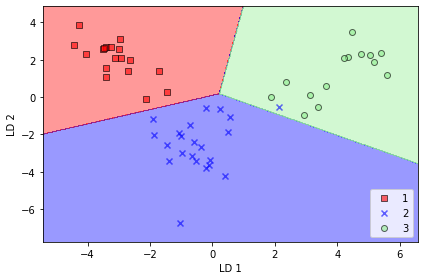

In [ ]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_lda = lr.predict(X_test_lda)
acc = accuracy_score(y_test, y_pred_lda)
print('Accuracy: %s' % acc)

Accuracy: 0.9629629629629629
